<h1> TeleCo Customers Data Exploration</h1>

<h2> Imporing data and packages </h2>

Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
import sys

Suppressing warning messages

In [2]:
warnings.filterwarnings('ignore')

Setting file paths

In [3]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) # setting path to parent directory
scripts_dir = os.path.join(parent_dir,"scripts") # setting path to scripts directory
data_path = os.path.join(parent_dir,"data","teleco_customers_data.csv") # setting path to data directory

sys.path.insert(1, scripts_dir)

Importing data cleaning and summarizing scripts

In [4]:
from data_cleaning_functions import DataCleaner as Cleaner 
from data_summarizing_functions import DataSummarizer as Sumar

cleaner = Cleaner()
sumar = Sumar()

Loading the data

In [5]:
df = pd.read_csv(data_path)

<h2>Data Cleaning</h2>

Taking a first look at the data

In [6]:
df.head() # looking the first few rows of the data.

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
df.shape # checking number of columns and rows

(150001, 55)

In [8]:
sumar.percent_missing(df) # looking at the percentage of total missing values in the data set

The dataset contains 12.5 % missing values.


In [9]:
sumar.summ_columns(df) # looking at all available columns

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Bearer Id,991,1.0,float64,134709
1,Start,1,0.0,object,9998
2,Start ms,1,0.0,float64,1001
3,End,1,0.0,object,6404
4,End ms,1,0.0,float64,1001
5,Dur. (ms),1,0.0,float64,89526
6,IMSI,570,0.0,float64,107266
7,MSISDN/Number,1066,1.0,float64,106857
8,IMEI,572,0.0,float64,107271
9,Last Location Name,1153,1.0,object,45548


**Observation**
<ul>
    <li> there are 150,0001 rows and 55 columns of data.</li>
    <li> some rows are missing upto 87% of their data.</li>
    <li> The columns are of two data types: string and float</li>
    
</ul>

Dimensionality reduction based on missing values. columns with greater than 30% data loss will be removed

In [10]:
df2 = cleaner.reduce_dim_missing(df, 30)
df2.shape

(150001, 45)

In [11]:
keep_list = ['Bearer Id','Dur. (ms)','IMSI','MSISDN/Number','IMEI','Activity Duration DL (ms)','Activity Duration UL (ms)','Handset Manufacturer','Handset Type','Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)','Total UL (Bytes)','Total DL (Bytes)']

df3 = cleaner.remove_cols(df2, keep_list, True)
sumar.summ_columns(df3)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Bearer Id,991,1.0,float64,134709
1,Dur. (ms),1,0.0,float64,89526
2,IMSI,570,0.0,float64,107266
3,MSISDN/Number,1066,1.0,float64,106857
4,IMEI,572,0.0,float64,107271
5,Activity Duration DL (ms),1,0.0,float64,102561
6,Activity Duration UL (ms),1,0.0,float64,106293
7,Handset Manufacturer,572,0.0,object,171
8,Handset Type,572,0.0,object,1397
9,Social Media DL (Bytes),0,0.0,float64,146856


Adjusting the data type of id columns

In [12]:
df3 = cleaner.format_number(df3, ['Bearer Id','IMSI','MSISDN/Number','IMEI']) # this will convert the specified columns to object type
sumar.summ_columns(df3)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Bearer Id,0,0.0,object,134709
1,Dur. (ms),1,0.0,float64,89526
2,IMSI,0,0.0,object,107266
3,MSISDN/Number,0,0.0,object,106857
4,IMEI,0,0.0,object,107271
5,Activity Duration DL (ms),1,0.0,float64,102561
6,Activity Duration UL (ms),1,0.0,float64,106293
7,Handset Manufacturer,572,0.0,object,171
8,Handset Type,572,0.0,object,1397
9,Social Media DL (Bytes),0,0.0,float64,146856


missing values of categorical variables will be filled by mode 
and missing values of  numerical variables will be filled by median values

In [13]:
df3 = cleaner.fill_missing_by_mode(df3) # fills all categorical variables with mode
df3 = cleaner.fill_missing_by_median(df3) # fills all numerical variables with median
sumar.summ_columns(df3)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Bearer Id,0,0.0,object,134709
1,Dur. (ms),0,0.0,float64,89525
2,IMSI,0,0.0,object,107266
3,MSISDN/Number,0,0.0,object,106857
4,IMEI,0,0.0,object,107271
5,Activity Duration DL (ms),0,0.0,float64,102561
6,Activity Duration UL (ms),0,0.0,float64,106293
7,Handset Manufacturer,0,0.0,object,170
8,Handset Type,0,0.0,object,1396
9,Social Media DL (Bytes),0,0.0,float64,146856


Converting Bytes to Megabytes.

In [14]:
df3 = cleaner.byte_to_mb(df3, "(Bytes)")
sumar.summ_columns(df3)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Bearer Id,0,0.0,object,134709
1,Dur. (ms),0,0.0,float64,89525
2,IMSI,0,0.0,object,107266
3,MSISDN/Number,0,0.0,object,106857
4,IMEI,0,0.0,object,107271
5,Activity Duration DL (ms),0,0.0,float64,102561
6,Activity Duration UL (ms),0,0.0,float64,106293
7,Handset Manufacturer,0,0.0,object,170
8,Handset Type,0,0.0,object,1396
9,Social Media DL (MB),0,0.0,float64,146856


<h2>Univariate Analysis</h2>

**SQL query based functions to explore handsets and their manufacturers**

What are the top 10 handsets used by customers?

In [15]:
handsets_df = sumar.get_top_n("df3", "Handset Type", 10, globals())
handsets_df

,Handset Type,user_count
0,Huawei B528S-23A,20324
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,Apple iPhone 7 (A1778),6326
4,Apple iPhone Se (A1723),5187
5,Apple iPhone 8 (A1905),4993
6,Apple iPhone Xr (A2105),4568
7,Samsung Galaxy S8 (Sm-G950F),4520
8,Apple iPhone X (A1901),3813
9,Samsung Galaxy A5 Sm-A520F,3724


What are the top 3 handset manufacturers?

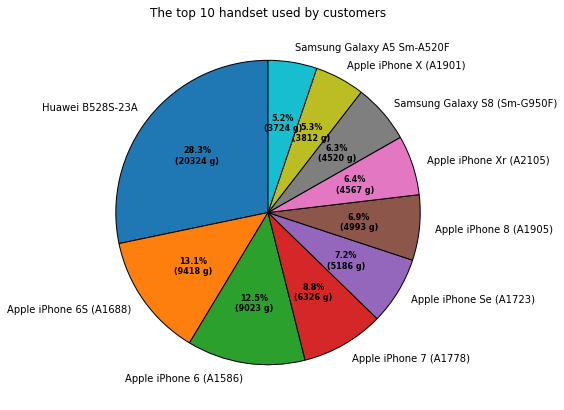

In [16]:
sumar.plot_pie(handsets_df, ['Handset Type','user_count'], "The top 10 handset used by customers")

In [17]:
top_man = sumar.get_top_n("df3", "Handset Manufacturer", 3, globals())
top_man

,Handset Manufacturer,user_count
0,Apple,60137
1,Samsung,40839
2,Huawei,34423


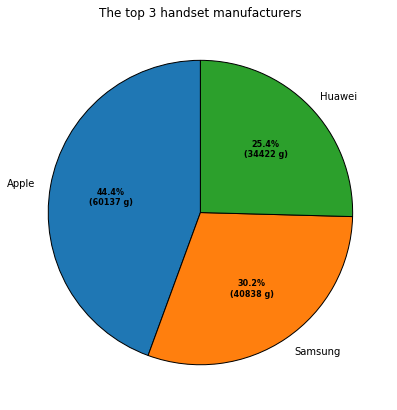

In [18]:
sumar.plot_pie(top_man, ['Handset Manufacturer','user_count'], "The top 3 handset manufacturers")

What are the top 5 Handsets per the top 3 handset manufacturers

In [19]:
sumar.manByHandset(top_man["Handset Manufacturer"].to_list(),'df3', globals())

  Handset Manufacturer             Handset Type  num_users
0                Apple  Apple iPhone 6S (A1688)       9419
1                Apple   Apple iPhone 6 (A1586)       9023
2                Apple   Apple iPhone 7 (A1778)       6326
3                Apple  Apple iPhone Se (A1723)       5187
4                Apple   Apple iPhone 8 (A1905)       4993 

  Handset Manufacturer                  Handset Type  num_users
0              Samsung  Samsung Galaxy S8 (Sm-G950F)       4520
1              Samsung    Samsung Galaxy A5 Sm-A520F       3724
2              Samsung   Samsung Galaxy J5 (Sm-J530)       3696
3              Samsung   Samsung Galaxy J3 (Sm-J330)       3484
4              Samsung  Samsung Galaxy S7 (Sm-G930X)       3199 

  Handset Manufacturer                    Handset Type  num_users
0               Huawei                Huawei B528S-23A      19752
1               Huawei                    Huawei E5180       2079
2               Huawei  Huawei P20 Lite Huawei Nova 3E      

**Observation**
<ul>
<li> The most used handset type is Huawei B528S-23A </li>
<li> But most of the handsets used are manufactured by Apple </li>
<li> From among the top three manufacturers, Apple iPhone 6S, Samsung Galaxy S8 (Sm-G950F), and Huawei B528S-23A are 
the most used handsets</li>

</ul>

<h3> Aggregating the data for further exploration </h3>

In [20]:
grouping_lis = ["MSISDN/Number"]
aggr_lis = ["Bearer Id", "Dur. (ms)", "Total DL (MB)", "Total UL (MB)", "Social Media DL (MB)", "Social Media UL (MB)",\
    "Youtube DL (MB)", "Youtube UL (MB)", "Netflix DL (MB)", "Netflix UL (MB)", "Google DL (MB)", "Google UL (MB)","Gaming DL (MB)","Gaming UL (MB)", "Email DL (MB)", "Email UL (MB)", "Other DL (MB)", "Other UL (MB)"] 
metric_lis = ["count", "sum", "sum", "sum", "sum", "sum", "sum", "sum","sum", "sum", "sum", "sum", "sum", "sum", "sum","sum", "sum","sum"]
col_names = ["xDr_session_count", "session_dur", "Total_DL", "Total_UL", "Social_DL", "Social_UL",\
    "Youtube_DL", "Youtube_UL", "Netflix_DL", "Netflix_UL", "Google_DL", "Google_UL", "Gaming_DL", "Gaming_UL", "Email_DL", "Email_UL", "Other_DL", "Other_UL"]


aggr_df = sumar.find_agg(df3, grouping_lis, aggr_lis, metric_lis, col_names)
sumar.combineColumns(aggr_df, "Total_DL", "Total_UL", "total_vol")
sumar.combineColumns(aggr_df, "Youtube_DL", "Youtube_UL", "youtube", True)
sumar.combineColumns(aggr_df, "Netflix_DL", "Netflix_UL", "netflix", True)
sumar.combineColumns(aggr_df, "Google_DL", "Google_UL", "google", True)
sumar.combineColumns(aggr_df, "Gaming_DL", "Gaming_UL", "gaming", True)
sumar.combineColumns(aggr_df, "Email_DL", "Email_UL", "email", True)
sumar.combineColumns(aggr_df, "Social_DL", "Social_UL", "social", True)
sumar.combineColumns(aggr_df, "Other_DL", "Other_UL", "other", True)

In [21]:
sumar.summ_columns(aggr_df)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,MSISDN/Number,0,0.0,object,106857
1,xDr_session_count,0,0.0,int64,18
2,session_dur,0,0.0,float64,77539
3,Total_DL,0,0.0,float64,106853
4,Total_UL,0,0.0,float64,106782
5,total_vol,0,0.0,float64,106854
6,youtube,0,0.0,float64,106763
7,netflix,0,0.0,float64,106765
8,google,0,0.0,float64,106637
9,gaming,0,0.0,float64,106855


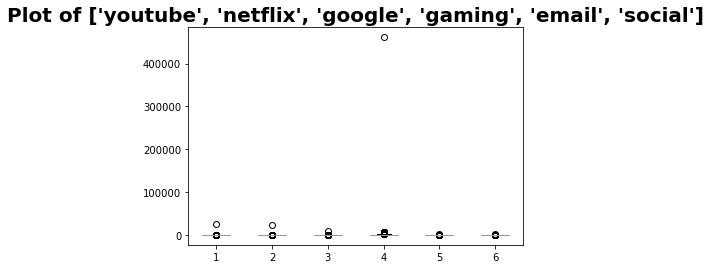

In [22]:
#sample_data = aggr_df.sample(3000)
sumar.plot_box(aggr_df, ['youtube', 'netflix', 'google', 'gaming', 'email', 'social'])

In [23]:
outlier_free_df = cleaner.removeOutliers(aggr_df, ['session_dur','youtube', 'netflix', 'google', 'gaming', 'email', 'social'])

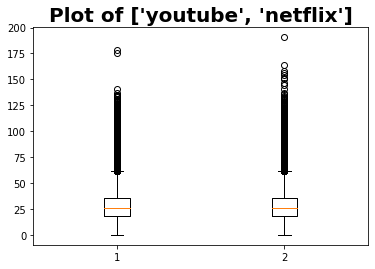

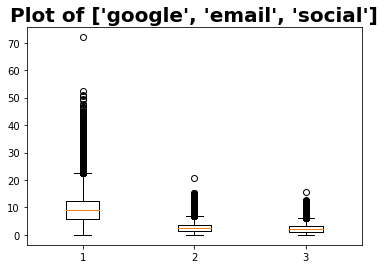

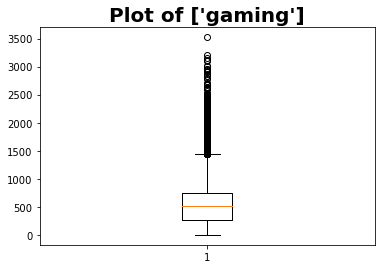

In [24]:
sumar.plot_box(outlier_free_df, ['youtube', 'netflix'])
sumar.plot_box(outlier_free_df, ['google', 'email', 'social'])
sumar.plot_box(outlier_free_df, ['gaming'])

In [25]:
sumar.summ_columns(outlier_free_df)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,MSISDN/Number,0,0.0,object,98804
1,xDr_session_count,0,0.0,int64,7
2,session_dur,0,0.0,float64,70404
3,Total_DL,0,0.0,float64,98801
4,Total_UL,0,0.0,float64,98734
5,total_vol,0,0.0,float64,98801
6,youtube,0,0.0,float64,98719
7,netflix,0,0.0,float64,98716
8,google,0,0.0,float64,98595
9,gaming,0,0.0,float64,98802


Basic summary of the aggregated dataframe.

In [26]:
outlier_free_df.describe()

,xDr_session_count,session_dur,Total_DL,Total_UL,total_vol,youtube,netflix,google,gaming,email,social,other
count,98804.000000,98804.000000,98804.000000,98804.000000,98804.000000,98804.000000,98804.000000,98804.000000,98804.000000,98804.000000,98804.000000,98804.000000
mean,1.259575,114380.338640,572.971028,51.817685,624.788713,28.503268,28.504271,9.831069,542.383127,2.843202,2.304304,541.151300
std,0.521917,70409.563804,361.403476,24.943180,375.983697,15.690494,15.789492,5.663054,353.160100,1.677751,1.502092,353.724684
min,1.000000,7142.000000,8.827082,2.866892,33.249009,0.078903,0.184569,0.040330,0.306358,0.018176,0.001563,0.149045
25%,1.000000,63326.000000,298.043458,35.726345,341.300094,18.065539,17.995513,5.717957,271.868433,1.600313,1.147838,269.980394
50%,1.000000,95372.000000,543.630466,45.427653,590.084076,25.787039,25.724300,9.187591,515.610819,2.676761,2.189129,513.307202
75%,1.000000,161656.500000,771.843685,59.432680,820.576448,35.520315,35.529224,12.470556,742.886427,3.662333,3.162573,740.933181
max,7.000000,324991.000000,3690.666979,332.044622,4009.943326,178.634466,190.646220,71.974850,3522.810324,20.610254,15.720516,3379.939123


<AxesSubplot:>

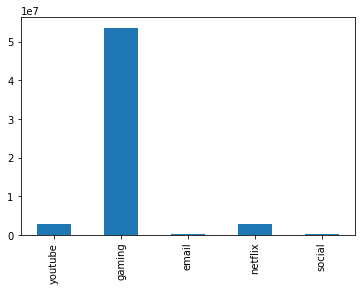

In [27]:
outlier_free_df[['youtube','gaming','email','netflix','social']].sum().plot(kind='bar')

Comparing the two applications with the smallest data volume share

<AxesSubplot:>

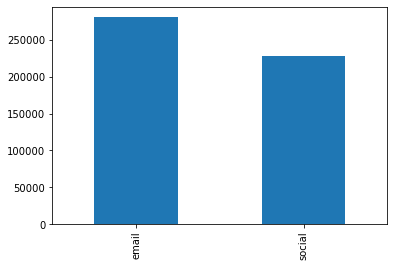

In [28]:
outlier_free_df[['email','social']].sum().plot(kind='bar')

<AxesSubplot:>

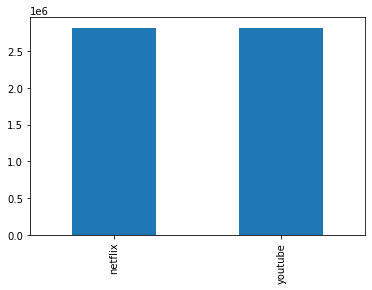

In [29]:
outlier_free_df[['netflix','youtube']].sum().plot(kind='bar')

(array([ 6779.,  9110.,  5701.,  5002., 18083.,  8639.,  5694.,  5814.,
         5455.,  5415.,  7838.,  3110.,  1823.,  1970.,  1714.,  2676.,
         1472.,   877.,   792.,   840.]),
 array([  7142.  ,  23034.45,  38926.9 ,  54819.35,  70711.8 ,  86604.25,
        102496.7 , 118389.15, 134281.6 , 150174.05, 166066.5 , 181958.95,
        197851.4 , 213743.85, 229636.3 , 245528.75, 261421.2 , 277313.65,
        293206.1 , 309098.55, 324991.  ]),
 <BarContainer object of 20 artists>)

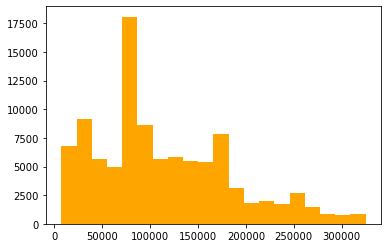

In [30]:
plt.hist(outlier_free_df['session_dur'],bins=20, color='orange')

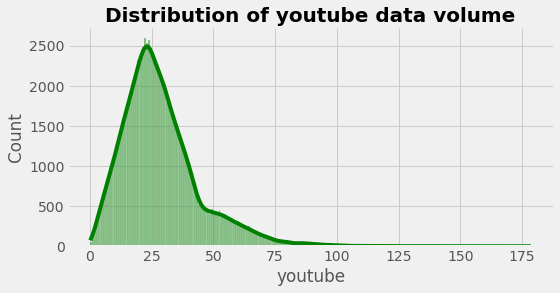

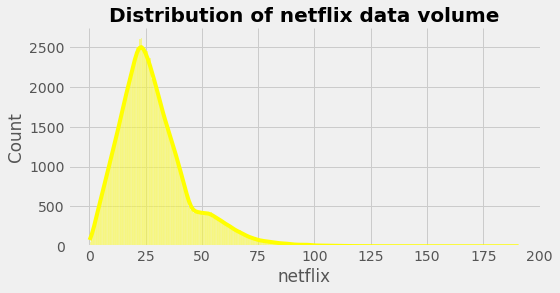

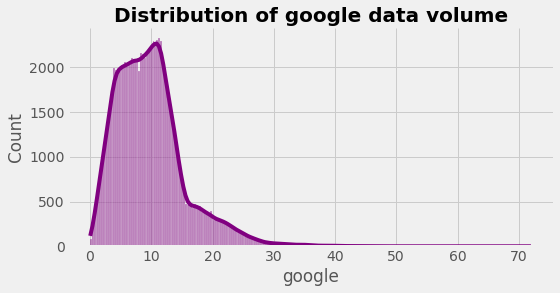

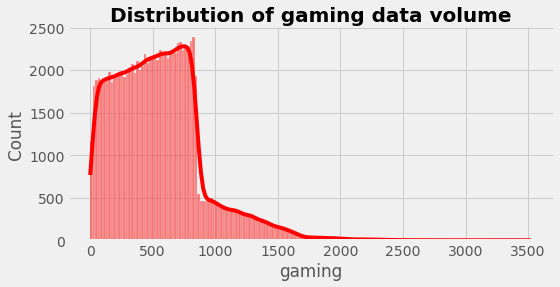

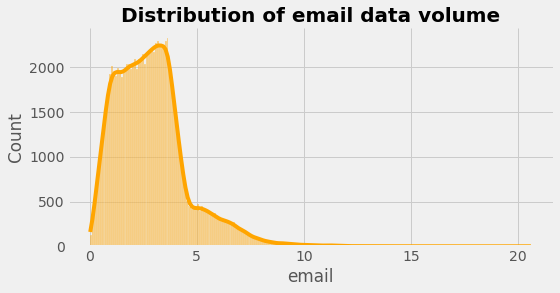

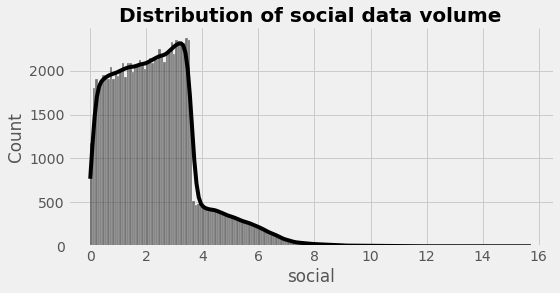

In [42]:
sumar.showDistribution(outlier_free_df, ['youtube', 'netflix', 'google', 'gaming', 'email', 'social'], ['green','yellow','purple','red','orange','black'])

In [43]:
def bivariateAnalysis(df, cols, colors): 
    for i in range(len(cols)):
        plt.style.use('fivethirtyeight')
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data = df, x=cols[i][0], y=cols[i][1], s=20, color=colors[i])
        sumar.corrMatrix(df, cols[i])

In [ ]:
bivariateAnalysis(outlier_free_df, [['total_vol','gaming'],['total_vol','netflix'],['total_vol','youtube'],['total_vol','social'],['total_vol','email'],['total_vol','google']],['green','yellow','purple','red','orange','black'])

In [33]:

sumar.topDecile(outlier_free_df, ['Decile'],"session_dur", ['total_vol'], ['sum'], ['total_vol_p_decile'])

,Decile,total_vol_p_decile
0,0,5.004928e+06
1,1,5.538083e+06
2,2,6.159362e+06
3,3,6.409661e+06
4,4,3.886534e+06
5,5,5.856078e+06


In [34]:
test_list = ['youtube', 'netflix', 'google', 'gaming', 'email', 'social', 'other']
sumar.corrMatrix(outlier_free_df, test_list)

,youtube,netflix,google,gaming,email,social,other
youtube,1.000000,0.567000,0.540704,0.473360,0.521501,0.476393,0.476963
netflix,0.567000,1.000000,0.540756,0.472881,0.525195,0.479258,0.471908
google,0.540704,0.540756,1.000000,0.455253,0.502460,0.457740,0.456342
gaming,0.473360,0.472881,0.455253,1.000000,0.438724,0.402892,0.397899
email,0.521501,0.525195,0.502460,0.438724,1.000000,0.447770,0.443133
social,0.476393,0.479258,0.457740,0.402892,0.447770,1.000000,0.404354
other,0.476963,0.471908,0.456342,0.397899,0.443133,0.404354,1.000000


In [35]:
#save_data_path = os.path.join(parent_dir,"data","teleco_aggr_data.csv") # setting path to data directory
#save_data_path_2 = os.path.join(parent_dir,"data","teleco_clean_data.csv") # setting path to data directory
#aggr_df.to_csv(save_data_path, index=False)
#df3.to_csv(save_data_path_2, index=False)